# Welcome to Learn ML 2021 Grand AI Challenge! 🎉

The year 2020 has been an outlier year for finance analysts. Most of the past models have failed to give out great results on the 2020 financial data creating a need for more robust models to handle such outliers. Hence with this challenge, we wish to test your analytical modelling skills not for 1 stock but 5 to see if you have what it takes to create a model that can give predictions for the outlier 2020 year. All the best for the challenge!

The aim of this challenge is to predict the closing prices of 5 stocks using the given data.

The dataset consists of 3 files:

    new_train.csv (for training)
    new_test.csv (for test)
    new_sample_submission.csv (for sample submission format)

This data should be used to train the model, no additional data is allowed to be used for the training process.

A "new_sample_submission.csv" is also provided for ease of the participants. To know the exact submission format, please check out "Submission Guidelines".




In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [5]:
train = pd.read_csv('Data/new_train.csv')
test = pd.read_csv('Data/new_test.csv')

In [6]:
train = train.sort_values('Date')
test = test.sort_values('Date')

In [7]:
train.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,...,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,...,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,...,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,...,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,...,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


###### Meaning of VWAP,Volume and Turnover of a stock

* **Volume Weighted Average Price (VWAP)?**

The volume weighted average price (VWAP) is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security. 

                                    VWAP =(∑(Price * Volume))/∑Volume

* **Volume** is measured in the number of shares traded on that day.
* **Stock Turnover** is the rate at which a company's goods are sold and replaced.


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              299 non-null    object 
 1   Open-Stock-1      299 non-null    float64
 2   High-Stock-1      299 non-null    float64
 3   Low-Stock-1       299 non-null    float64
 4   Close-Stock-1     299 non-null    float64
 5   VWAP-Stock-1      299 non-null    float64
 6   Volume-Stock-1    299 non-null    int64  
 7   Turnover-Stock-1  299 non-null    int64  
 8   Open-Stock-2      299 non-null    float64
 9   High-Stock-2      299 non-null    float64
 10  Low-Stock-2       299 non-null    float64
 11  Close-Stock-2     299 non-null    float64
 12  VWAP-Stock-2      299 non-null    float64
 13  Volume-Stock-2    299 non-null    int64  
 14  Turnover-Stock-2  299 non-null    int64  
 15  Open-Stock-3      299 non-null    float64
 16  High-Stock-3      299 non-null    float64
 1

In [9]:
train.isna().sum()

Date                0
Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

In [10]:
train['Date'] = train['Date'].astype('datetime64')
test['Date'] = test['Date'].astype('datetime64')

###### Converting the Date column into Day,Month,Year

In [11]:
train['Day'] = train['Date'].dt.day
train['Month']= train['Date'].dt.month
train['Year']= train['Date'].dt.year

test['Day'] = test['Date'].dt.day
test['Month']= test['Date'].dt.month
test['Year']= test['Date'].dt.year

In [12]:
train.isnull().sum()

Date                0
Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
Day                 0
Month               0
Year                0
dtype: int64

# Creating different datasets for each stock 

In [13]:
stock1 = train[['Day','Month','Year', 'Open-Stock-1', 'High-Stock-1', 'Low-Stock-1', 'Close-Stock-1','VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1']]
stock2 = train[['Date','Day','Month','Year', 'Open-Stock-2', 'High-Stock-2', 'Low-Stock-2', 'Close-Stock-2','VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2']]
stock3 = train[['Date','Day','Month','Year', 'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3', 'Close-Stock-3','VWAP-Stock-3', 'Volume-Stock-3', 'Turnover-Stock-3']]
stock4 = train[['Date','Day','Month','Year', 'Open-Stock-4', 'High-Stock-4', 'Low-Stock-4', 'Close-Stock-4','VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4']]
stock5 = train[['Date','Day','Month','Year', 'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5', 'Close-Stock-5','VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5']]

In [14]:
tstock1 = test[['Day','Month','Year', 'Open-Stock-1', 'High-Stock-1', 'Low-Stock-1','VWAP-Stock-1', 'Volume-Stock-1', 'Turnover-Stock-1']]
tstock2 = test[['Day','Month','Year', 'Open-Stock-2', 'High-Stock-2', 'Low-Stock-2','VWAP-Stock-2', 'Volume-Stock-2', 'Turnover-Stock-2']]
tstock3 = test[['Day','Month','Year', 'Open-Stock-3', 'High-Stock-3', 'Low-Stock-3','VWAP-Stock-3', 'Volume-Stock-3', 'Turnover-Stock-3']]
tstock4 = test[['Day','Month','Year', 'Open-Stock-4', 'High-Stock-4', 'Low-Stock-4','VWAP-Stock-4', 'Volume-Stock-4', 'Turnover-Stock-4']]
tstock5 = test[['Day','Month','Year', 'Open-Stock-5', 'High-Stock-5', 'Low-Stock-5','VWAP-Stock-5', 'Volume-Stock-5', 'Turnover-Stock-5']]

In [15]:
def distribution_func(data):
    fig,ax = plt.subplots(4,2,figsize = (15,15))
    l = list(data.columns)
    for i in range(4):
        for j in range(2):
            sns.kdeplot(l[j],data = data,ax = ax[i,j])
            l.pop(j)

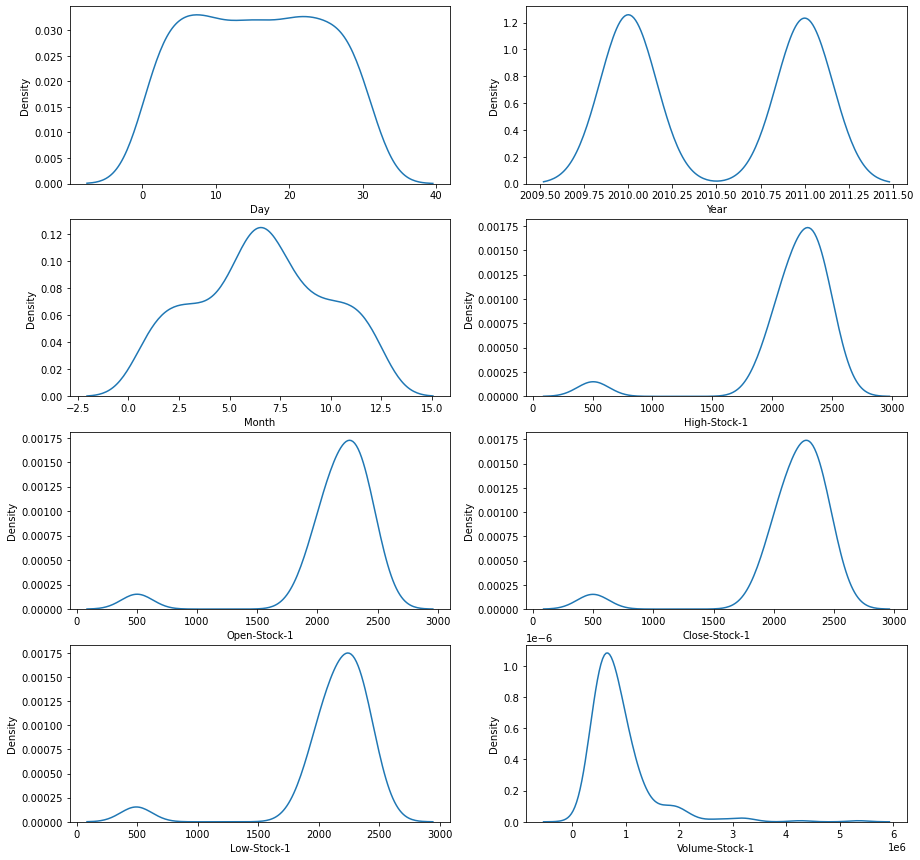

In [16]:
distribution_func(stock1)

In [17]:
def scatter_func(data):
    fig,ax = plt.subplots(4,2,figsize = (15,15))
    l = list(data.columns)
    for i in range(4):
        for j in range(2):
            sns.scatterplot(l[j],data['Close-Stock-1'],data = data,ax = ax[i,j])
            l.pop(j)

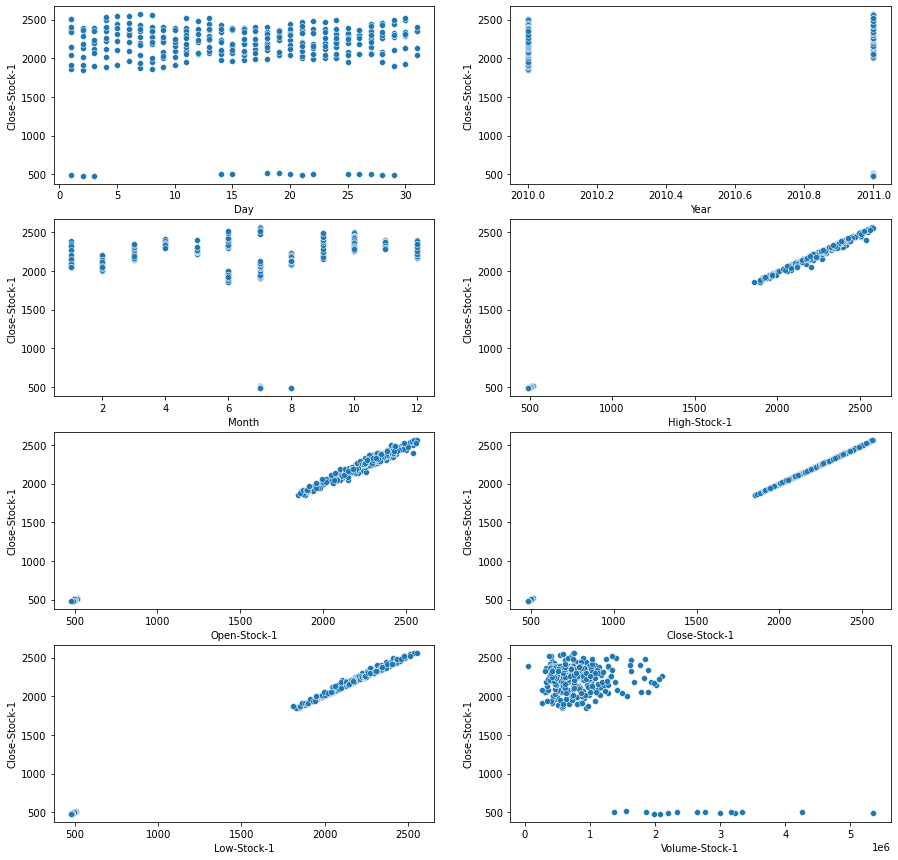

In [18]:
scatter_func(stock1)

###### As is apparent from the scatter and the distribution, we have few outliers in stock 1

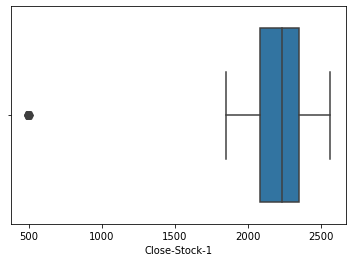

In [19]:
sns.boxplot(stock1['Close-Stock-1'])
plt.show()

In [20]:
# stock1 = stock1[stock1['Close-Stock-1']>700]

In [21]:
stock1.head()

,Day,Month,Year,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1
0,1,6,2010,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000
1,2,6,2010,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000
2,3,6,2010,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000
3,4,6,2010,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000
4,7,6,2010,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000


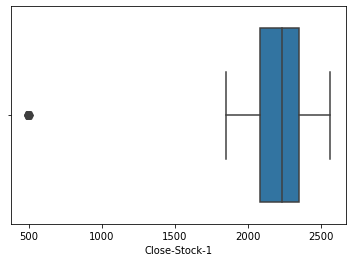

In [22]:
sns.boxplot(stock1['Close-Stock-1'])
plt.show()

###### Outlier has been removed

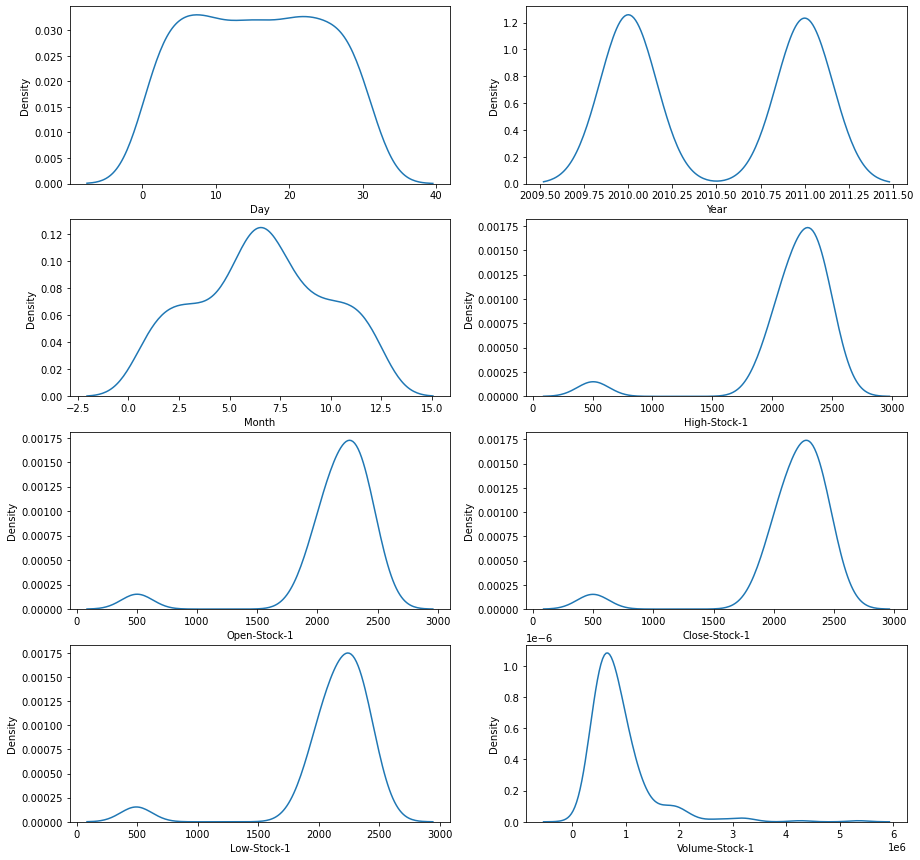

In [23]:
distribution_func(stock1)

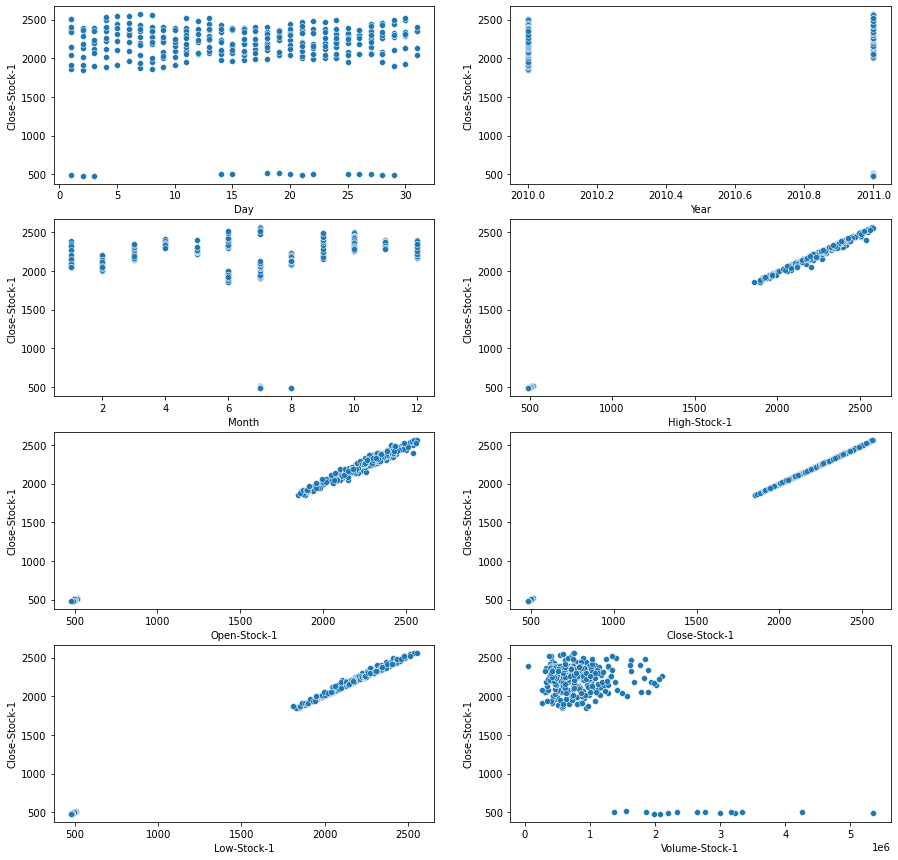

In [24]:
scatter_func(stock1)

###### Data is much more normally distributed now

In [25]:
stock1.head()

,Day,Month,Year,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1
0,1,6,2010,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000
1,2,6,2010,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000
2,3,6,2010,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000
3,4,6,2010,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000
4,7,6,2010,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000


In [26]:
stock1.shape

(299, 10)

In [27]:
284*0.2

56.800000000000004

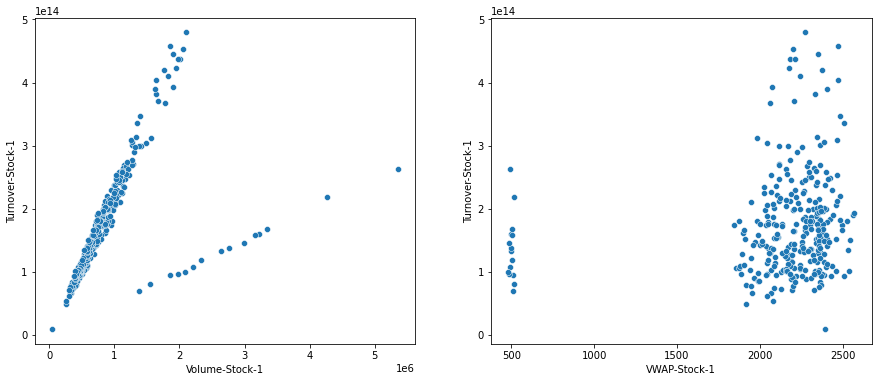

In [28]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
sns.scatterplot('Volume-Stock-1','Turnover-Stock-1',data = stock1,ax = ax[0])
sns.scatterplot('VWAP-Stock-1','Turnover-Stock-1',data = stock1,ax = ax[1])


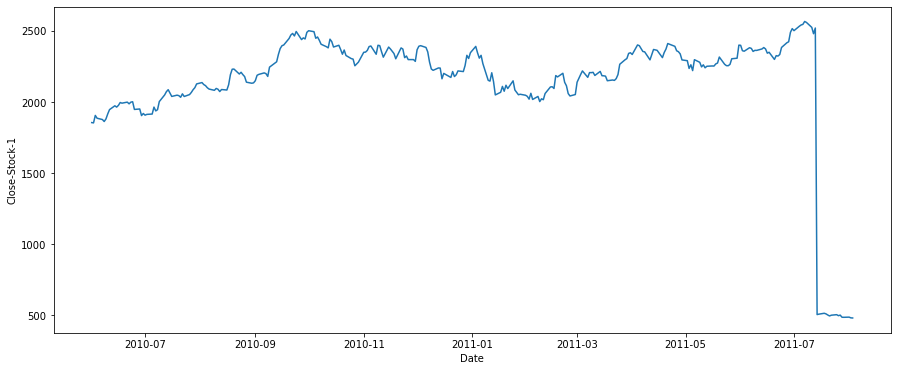

In [29]:
plt.figure(figsize = (15,6))
sns.lineplot(train['Date'],stock1['Close-Stock-1'])
plt.show()

In [30]:
stock1.shape

(299, 10)

In [31]:
s1_train = stock1[:(299-56)]
s1_test = stock1[(299-56):]

In [32]:
s1_train.shape,s1_test.shape

((243, 10), (56, 10))

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mm = MinMaxScaler()
x_train = mm.fit_transform(s1_train.drop('Close-Stock-1',axis = 1))
x_test = mm.fit_transform(s1_test.drop('Close-Stock-1',axis = 1))

y_train = s1_train['Close-Stock-1']
y_test = s1_test['Close-Stock-1']

# Trying LSTM

In [35]:
# !pip install tensorflow

In [80]:
mm = MinMaxScaler()
train = mm.fit_transform(np.array(stock1['Close-Stock-1']).reshape(-1,1))
ytrain = []
xtrain = []
j = 0
for i in range(len(train)):
    c = 0
    x = []
    for k in np.squeeze(train[c:(c+50)]):
        x.append(np.squeeze(k))
    ytrain.append(np.squeeze(train[i]))
    c+=50
    xtrain.append(x)
   

In [81]:
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

In [84]:
xtrain.shape,ytrain.shape

((299, 50), (299,))

# LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
y_pred = lr.predict(x_test)

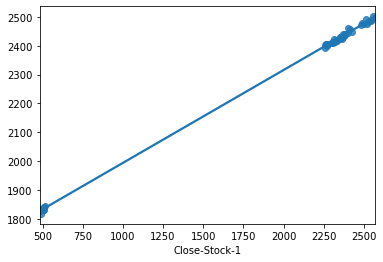

In [36]:
sns.regplot(y_test,y_pred)

###### As can be seen in the above graph, the linear regression model has predicted values accurately however it has not taken time into consideration.

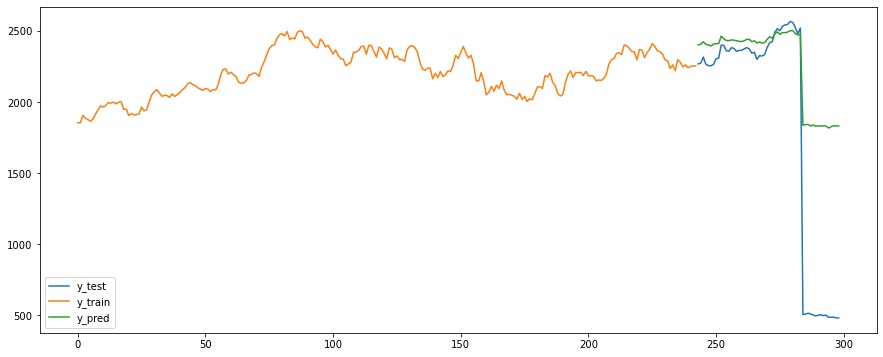

In [37]:
plt.figure(figsize = (15,6))
y_test.plot()
y_train.plot()
p = pd.Series(y_pred,index = range(243,299))
p.plot()

#p.index
plt.legend(['y_test','y_train','y_pred'],loc = 'lower left')
plt.show()

###### The linear regression model is bound to perform poorly since it is not built to create a model based on time. While the regression model is able to show a drop but due to lack of data on the lower end, we can see that the value is not dropping beyond a certain range.

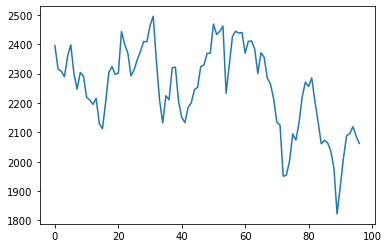

In [38]:
data = mm.fit_transform(tstock1)
predictions = lr.predict(data)
pd.Series(predictions).plot()
plt.show()

###### While trying to predict on our data that has no open_price around 2000, the linear regression model is still predicting high values. This is happening because the linear model is more biased towards giving us higher results sinice the train data has higher values..

In [39]:
rmse(y_test,y_pred)

693.9822571688413